In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster

In [ ]:
# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/processed_novels_with_labels.csv'

# Load the dataset and display the first few rows to verify structure
df_sentences = pd.read_csv(dataset_path)
print("Dataset structure:")
print(df_sentences.head())

Dataset structure:
     Author               Book_Title  Chapter  \
0  Ann_Cole  Mr. Mysterious In Black        1   
1  Ann_Cole  Mr. Mysterious In Black        1   
2  Ann_Cole  Mr. Mysterious In Black        1   
3  Ann_Cole  Mr. Mysterious In Black        1   
4  Ann_Cole  Mr. Mysterious In Black        1   

                                            Sentence  topic  \
0                            Prologue H e was tired.    210   
1                                         Dog-tired.    210   
2  Amped up by pleasure mere minutes ago, his hea...     20   
3  Unfortunately, he was yanked back from the bec...     23   
4  Languid, he opened his eyes to the annoying re...     -1   

                                   topic_probability  Topic  \
0  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
1  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
2  [0.0017705  0.00184171 0.00216719 0.00173465 0...     20   
3  [0.00237123 0.00262983 0.00200518 0.00196397 0...   

In [ ]:
# Define noisy topics to exclude
noisy_topics_to_exclude = [-1, 76, 117, 165, 190]

# Filter the DataFrame to remove rows with noisy topics
df_filtered = df_sentences[~df_sentences['topic'].isin(noisy_topics_to_exclude)].copy()

print("Filtered dataset (no noisy topics):")
print(df_filtered.head())

Filtered dataset (no noisy topics):
     Author               Book_Title  Chapter  \
0  Ann_Cole  Mr. Mysterious In Black        1   
1  Ann_Cole  Mr. Mysterious In Black        1   
2  Ann_Cole  Mr. Mysterious In Black        1   
3  Ann_Cole  Mr. Mysterious In Black        1   
6  Ann_Cole  Mr. Mysterious In Black        1   

                                            Sentence  topic  \
0                            Prologue H e was tired.    210   
1                                         Dog-tired.    210   
2  Amped up by pleasure mere minutes ago, his hea...     20   
3  Unfortunately, he was yanked back from the bec...     23   
6  His eyes skidded over the olive-skinned, plati...      8   

                                   topic_probability  Topic  \
0  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
1  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
2  [0.0017705  0.00184171 0.00216719 0.00173465 0...     20   
3  [0.00237123 0.00262983 0.00200518 0

In [ ]:
# Aggregate topic data by 'Book_Title' and 'topic' to create the topic distribution matrix
# This counts the occurrences of each topic per book
df_topic_distribution = df_filtered.groupby(['Book_Title', 'topic']).size().unstack(fill_value=0)

print("Topic distribution matrix by book:")
print(df_topic_distribution.head())

Topic distribution matrix by book:
topic                                  0    1    2    3    4    5    6    \
Book_Title                                                                 
A Long Time Coming                     224  160  106   32  311   64  263   
A Not So Meet Cute                     206  222   87   44  243   84  108   
Ache for You                           191   74   79   41  175   84   95   
An Accidental Date with a Billionaire  104   50   22   22  142   20   22   
Bad Boss                               251   44   36   35  128   47   14   

topic                                   7    8    9    ...  206  207  208  \
Book_Title                                             ...                  
A Long Time Coming                     1453   56   21  ...    2    0    2   
A Not So Meet Cute                      416   49  149  ...    3    1    6   
Ache for You                            345   42   32  ...    5    1    3   
An Accidental Date with a Billionaire   111   2

In [ ]:
import os

# Define the folder path
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the topic distribution matrix to the specified folder
df_topic_distribution.to_csv(os.path.join(folder_path, 'topic_distribution_matrix_by_book.csv'))

In [ ]:
import os
import pandas as pd

# Define dataset path
dataset_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/processed_novels_with_labels.csv'

# Load the dataset
df_sentences = pd.read_csv(dataset_path)
print("Initial dataset structure:")
print(df_sentences.head())

# Define noisy topics to exclude
noisy_topics_to_exclude = [-1, 76, 117, 165, 190]

# Filter the DataFrame to remove rows with noisy topics
df_filtered = df_sentences[~df_sentences['topic'].isin(noisy_topics_to_exclude)].copy()
print("\nFiltered dataset (no noisy topics):")
print(df_filtered.head())

# Aggregate topic data by 'Book_Title' and 'topic' to create the topic distribution matrix
df_topic_distribution = df_filtered.groupby(['Book_Title', 'topic']).size().unstack(fill_value=0)
print("\nTopic distribution matrix by book:")
print(df_topic_distribution.head())

# Reset index for merging labels
df_topic_distribution = df_topic_distribution.reset_index()
print("\nTopic distribution matrix with reset index:")
print(df_topic_distribution.head())

# Extract unique topic-label pairs
topic_labels = df_sentences[['topic', 'Label']].drop_duplicates().set_index('topic')
print("\nUnique topic-label pairs:")
print(topic_labels.head())

# Create a dictionary for renaming topics to their labels
topic_label_dict = topic_labels['Label'].to_dict()
print("\nTopic label dictionary (sample):")
print(dict(list(topic_label_dict.items())[:5]))  # Print first 5 entries for brevity

# Add topic labels to the matrix by renaming the columns
df_topic_distribution_with_labels = df_topic_distribution.rename(columns=topic_label_dict)
print("\nTopic distribution matrix with labels added:")
print(df_topic_distribution_with_labels.head())

# Define folder path and create it if it doesn't exist
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'
os.makedirs(folder_path, exist_ok=True)
print(f"\nFolder '{folder_path}' is ready.")

# Define the output file path
output_path = os.path.join(folder_path, 'topic_distribution_matrix_by_book_with_topics_labels.csv')

# Save the topic distribution matrix with labels to the specified path
df_topic_distribution_with_labels.to_csv(output_path, index=False)
print(f"\nTopic distribution matrix with labels saved to: {output_path}")

# Verify by loading the saved file
df_loaded = pd.read_csv(output_path)
print("\nLoaded DataFrame from saved CSV:")
print(df_loaded.head())

Initial dataset structure:
     Author               Book_Title  Chapter  \
0  Ann_Cole  Mr. Mysterious In Black        1   
1  Ann_Cole  Mr. Mysterious In Black        1   
2  Ann_Cole  Mr. Mysterious In Black        1   
3  Ann_Cole  Mr. Mysterious In Black        1   
4  Ann_Cole  Mr. Mysterious In Black        1   

                                            Sentence  topic  \
0                            Prologue H e was tired.    210   
1                                         Dog-tired.    210   
2  Amped up by pleasure mere minutes ago, his hea...     20   
3  Unfortunately, he was yanked back from the bec...     23   
4  Languid, he opened his eyes to the annoying re...     -1   

                                   topic_probability  Topic  \
0  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
1  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
2  [0.0017705  0.00184171 0.00216719 0.00173465 0...     20   
3  [0.00237123 0.00262983 0.00200518 0.00196397

In [ ]:
# Calculate the correlation matrix for the topic columns (excluding 'Book_Title')
correlation_matrix = df_topic_distribution_with_labels.drop(columns=['Book_Title']).corr()

# Display the correlation matrix to identify relationships between themes
print("Topic Correlation Matrix:")
print(correlation_matrix)

# Save correlation matrix as CSV for external analysis if needed
correlation_output_path = os.path.join(folder_path, 'topic_correlation_matrix.csv')
correlation_matrix.to_csv(correlation_output_path)
print(f"\nTopic correlation matrix saved to: {correlation_output_path}")

Topic Correlation Matrix:
topic                                     Laughter and Joy  \
topic                                                        
Laughter and Joy                                  1.000000   
Romantic Meals and Dates                          0.414479   
Bedroom and Cozy Blankets                         0.562636   
Luxury Cars and Driving                           0.675986   
Inner Conflicts and Doubts                        0.447404   
...                                                    ...   
Charity and Giving                               -0.003366   
Kicking and Martial Arts                          0.341385   
Moments of Comfort and Relaxation                 0.360058   
Cozy Romantic Settings (like Fireplaces)          0.024435   
Dealing with Doubts and Uncertainty               0.205694   

topic                                     Romantic Meals and Dates  \
topic                                                                
Laughter and Joy           

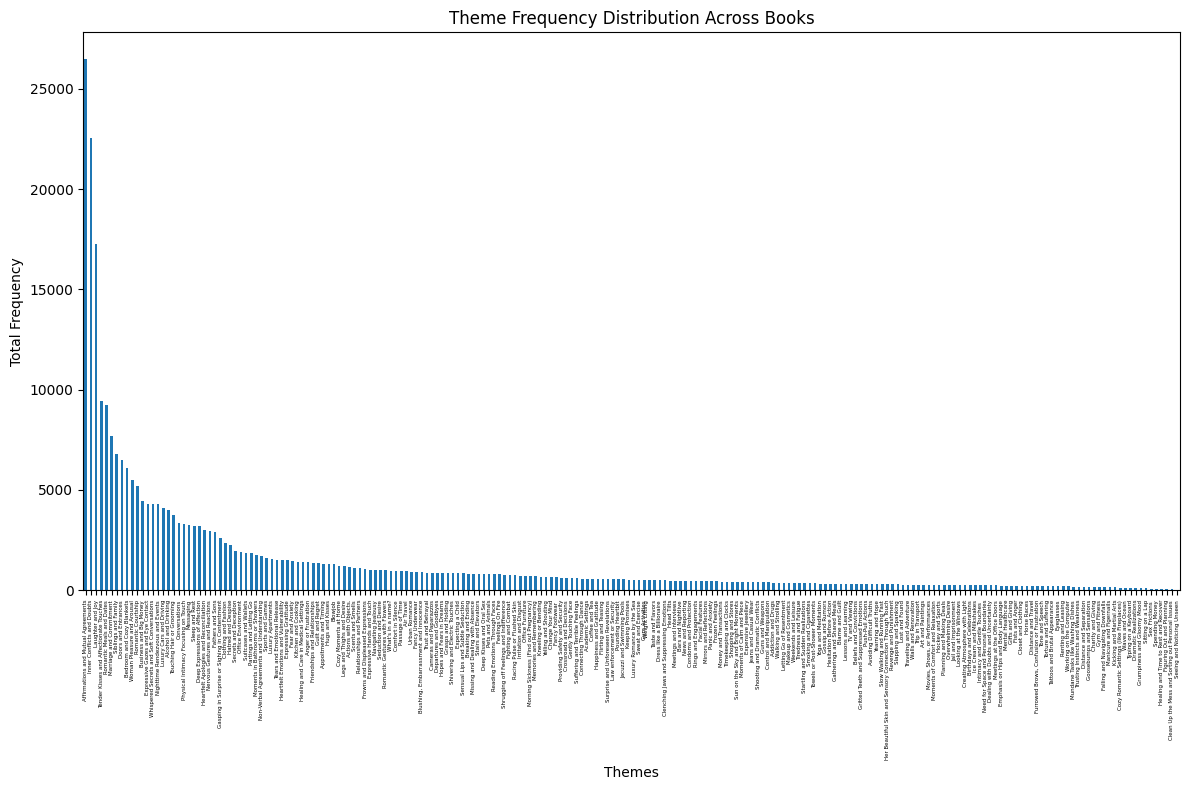

In [ ]:
import matplotlib.pyplot as plt

# Sum the frequency of each theme across all books to get total counts per theme
theme_frequency = df_topic_distribution_with_labels.drop(columns=['Book_Title']).sum().sort_values(ascending=False)

# Plot the frequency distribution
plt.figure(figsize=(12, 8))
theme_frequency.plot(kind='bar', title='Theme Frequency Distribution Across Books')
plt.xlabel('Themes')
plt.ylabel('Total Frequency')
plt.xticks(rotation=90, fontsize=4)  # Adjust fontsize here
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total frequency and variance for each theme
theme_total_frequency = df_topic_distribution_with_labels.drop(columns=['Book_Title']).sum()
theme_variance = df_topic_distribution_with_labels.drop(columns=['Book_Title']).var()

# Combine the results into a DataFrame for easier sorting and ranking
theme_importance_df = pd.DataFrame({
    'Total_Frequency': theme_total_frequency,
    'Variance': theme_variance
}).sort_values(by=['Total_Frequency', 'Variance'], ascending=[False, False])

# Display the ranking of themes by frequency and variance
print(theme_importance_df)

                                                   Total_Frequency  \
topic                                                                
Affirmations and Mutual Agreements                           26493   
Inner Conflicts and Doubts                                   22565   
Laughter and Joy                                             17242   
Tender Kisses and Affectionate Touches                        9455   
Romantic Meals and Dates                                      9252   
...                                                            ...   
Spending Money                                                  83   
Healing and Time to Rest and Recover                            81   
Figuring Out and Planning                                       53   
Clean Up the Mess and Sorting out Personal Issues               38   
Seeing and Noticing Unseen                                      19   

                                                       Variance  
topic                  

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Calculate total frequency and variance for each theme
theme_total_frequency = df_topic_distribution_with_labels.drop(columns=['Book_Title']).sum()
theme_variance = df_topic_distribution_with_labels.drop(columns=['Book_Title']).var()

# Combine the results into a DataFrame for easier sorting and ranking
theme_importance_df = pd.DataFrame({
    'Total_Frequency': theme_total_frequency,
    'Variance': theme_variance
})

# Adding rank columns based on frequency and variance individually
theme_importance_df['Frequency_Rank'] = theme_importance_df['Total_Frequency'].rank(ascending=False)
theme_importance_df['Variance_Rank'] = theme_importance_df['Variance'].rank(ascending=False)

# Sorting by both criteria to provide an ordered view
theme_importance_df = theme_importance_df.sort_values(by=['Frequency_Rank', 'Variance_Rank'])

# Selecting relevant columns for the final analysis table
theme_importance_table = theme_importance_df[['Total_Frequency', 'Variance', 'Frequency_Rank', 'Variance_Rank']]

# Displaying the ranking of themes by frequency and variance
print("Theme Importance Table for Analysis Report:")
print(theme_importance_table)

Theme Importance Table for Analysis Report:
                                                   Total_Frequency  \
topic                                                                
Affirmations and Mutual Agreements                           26493   
Inner Conflicts and Doubts                                   22565   
Laughter and Joy                                             17242   
Tender Kisses and Affectionate Touches                        9455   
Romantic Meals and Dates                                      9252   
...                                                            ...   
Spending Money                                                  83   
Healing and Time to Rest and Recover                            81   
Figuring Out and Planning                                       53   
Clean Up the Mess and Sorting out Personal Issues               38   
Seeing and Noticing Unseen                                      19   

                                             

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Calculate total frequency and variance for each theme
theme_total_frequency = df_topic_distribution_with_labels.drop(columns=['Book_Title']).sum()
theme_variance = df_topic_distribution_with_labels.drop(columns=['Book_Title']).var()

# Define adjusted thresholds
frequency_threshold_adjusted = theme_total_frequency.quantile(0.65)  # 65th percentile for high frequency
variance_threshold_adjusted = theme_variance.quantile(0.30)          # 30th percentile for low variance

# Identifying themes that meet either high frequency or low variance criteria individually
# High Frequency Only
high_frequency_themes = theme_total_frequency[theme_total_frequency > frequency_threshold_adjusted].index
high_frequency_df = pd.DataFrame({
    'Total_Frequency': theme_total_frequency[high_frequency_themes],
    'Variance': theme_variance[high_frequency_themes]
}).sort_values(by='Total_Frequency', ascending=False)

# Low Variance Only
low_variance_themes = theme_variance[theme_variance < variance_threshold_adjusted].index
low_variance_df = pd.DataFrame({
    'Total_Frequency': theme_total_frequency[low_variance_themes],
    'Variance': theme_variance[low_variance_themes]
}).sort_values(by='Variance')

# Display the dataframes for high frequency and low variance themes
print("High Frequency Themes:")
print(high_frequency_df)
print("\nLow Variance Themes:")
print(low_variance_df)

High Frequency Themes:
                                        Total_Frequency      Variance
topic                                                                
Affirmations and Mutual Agreements                26493  62616.006044
Inner Conflicts and Doubts                        22565   9800.683150
Laughter and Joy                                  17242   9121.397985
Tender Kisses and Affectionate Touches             9455   1764.718864
Romantic Meals and Dates                           9252   3451.659890
...                                                 ...           ...
Hopes and Fears in Dreams                           868     50.158974
Shivering and Electric Touches                      867    106.558242
Grasps and Holding                                  867     44.635165
Expecting a Child                                   861    116.546154
Sensual Lips and Subtle Seduction                   855     66.142857

[74 rows x 2 columns]

Low Variance Themes:
                      

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Define the number of top themes to extract for each book
top_n = 10

# Exclude 'Book_Title' column for numeric theme data
theme_data_numeric_only = df_topic_distribution_with_labels.drop(columns=['Book_Title'])

# Function to get top N themes for each book
top_themes_by_book = theme_data_numeric_only.apply(lambda row: row.nlargest(top_n).index.tolist(), axis=1)

# Creating a DataFrame to associate each book with its top themes
top_themes_df = pd.DataFrame({
    'Book_Title': df_topic_distribution_with_labels['Book_Title'],
    'Top_Themes': top_themes_by_book
})

# Display the result
print("Top Themes by Book:")
print(top_themes_df)

Top Themes by Book:
                                Book_Title  \
0                       A Long Time Coming   
1                       A Not So Meet Cute   
2                             Ache for You   
3    An Accidental Date with a Billionaire   
4                                 Bad Boss   
..                                     ...   
100                                Trouble   
101                           Twisted Lies   
102                           Twisted Love   
103                                 Tycoon   
104              Unmasking the Billionaire   

                                            Top_Themes  
0    [Affirmations and Mutual Agreements, Inner Con...  
1    [Affirmations and Mutual Agreements, Inner Con...  
2    [Affirmations and Mutual Agreements, Laughter ...  
3    [Inner Conflicts and Doubts, Affirmations and ...  
4    [Laughter and Joy, Affirmations and Mutual Agr...  
..                                                 ...  
100  [Inner Conflicts and Do

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Define the number of top themes to extract for each book
top_n = 10

# Exclude 'Book_Title' column for numeric theme data
theme_data_numeric_only = df_topic_distribution_with_labels.drop(columns=['Book_Title'])

# Function to get top N themes for each book
top_themes_by_book = theme_data_numeric_only.apply(lambda row: row.nlargest(top_n).index.tolist(), axis=1)

# Creating a DataFrame to associate each book with its top themes
top_themes_df = pd.DataFrame({
    'Book_Title': df_topic_distribution_with_labels['Book_Title'],
    'Top_Themes': top_themes_by_book
})

# Define the folder path where the output will be saved
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'

# Define the full output path for the CSV file
output_path = f"{folder_path}/top_themes_by_book.csv"

# Save the DataFrame to CSV
top_themes_df.to_csv(output_path, index=False)
print(f"Top themes by book saved to: {output_path}")

Top themes by book saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/top_themes_by_book.csv


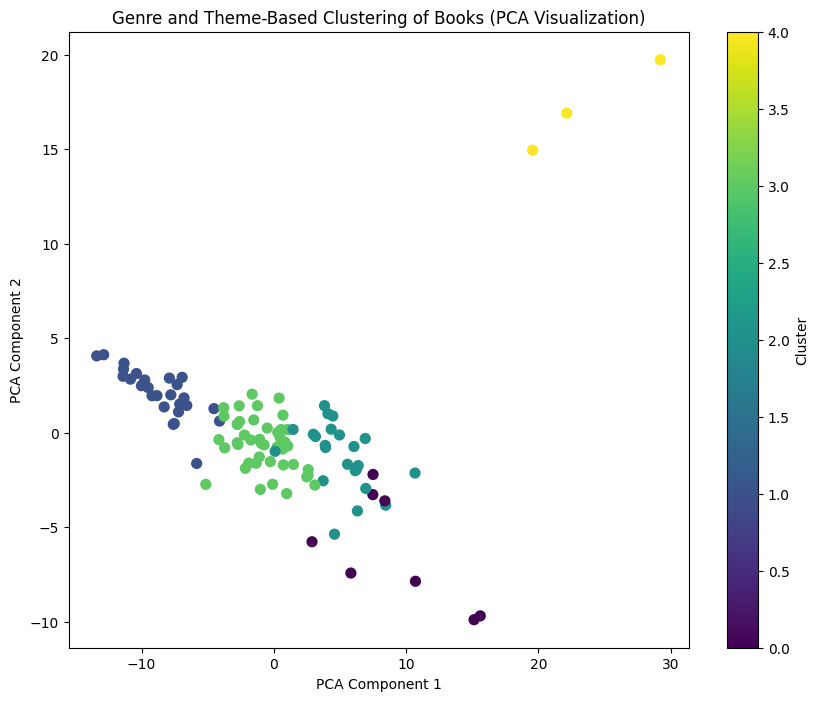

Clustered theme data saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/book_clusters_with_theme_data.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_topic_distribution_with_labels is already loaded and filtered in your environment

# Prepare the data for clustering by excluding 'Book_Title'
theme_data_for_clustering = df_topic_distribution_with_labels.drop(columns=['Book_Title'])

# Standardize the theme data
scaler = StandardScaler()
scaled_theme_data = scaler.fit_transform(theme_data_for_clustering)

# Apply KMeans clustering with a predefined number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_theme_data)

# Add the cluster labels to the original DataFrame for reference
df_topic_distribution_with_labels['Cluster'] = kmeans_labels

# Perform PCA for dimensionality reduction to visualize clusters in 2D
pca = PCA(n_components=2)
theme_data_pca = pca.fit_transform(scaled_theme_data)

# Plot the clusters in a 2D space
plt.figure(figsize=(10, 8))
plt.scatter(theme_data_pca[:, 0], theme_data_pca[:, 1], c=kmeans_labels, cmap="viridis", s=50)
plt.title("Genre and Theme-Based Clustering of Books (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Save the DataFrame with cluster assignments to your specified folder
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'
output_path = f"{folder_path}/book_clusters_with_theme_data.csv"
df_topic_distribution_with_labels.to_csv(output_path, index=False)
print(f"Clustered theme data saved to: {output_path}")

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels with cluster assignments is loaded in your environment

# Exclude 'Book_Title' to focus only on numeric theme columns
numeric_data = df_topic_distribution_with_labels.drop(columns=['Book_Title'])

# Calculate the mean theme frequency for each cluster
cluster_characteristics = numeric_data.groupby('Cluster').mean().transpose()

# Select the top themes in each cluster
top_themes_per_cluster = cluster_characteristics.apply(lambda x: x.nlargest(5), axis=0)

# Display the top themes in each cluster
print("Top Themes in Each Cluster:")
print(top_themes_per_cluster)

# Save the top themes per cluster to a CSV file in the specified folder
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'
output_path = f"{folder_path}/top_themes_per_cluster.csv"
top_themes_per_cluster.to_csv(output_path)
print(f"Top themes per cluster saved to: {output_path}")

Top Themes in Each Cluster:
Cluster                                       0           1           2  \
Affirmations and Mutual Agreements      760.500   87.076923  310.391304   
Frowns and Displeased Expressions           NaN         NaN         NaN   
Inner Conflicts and Doubts              275.000  109.500000  305.739130   
Laughter and Joy                        320.000   66.653846  181.173913   
Marriage and Commitment                     NaN         NaN  119.956522   
Romantic Meals and Dates                138.375         NaN  111.739130   
Tender Kisses and Affectionate Touches  151.125   56.153846         NaN   
Woman Pleasure and Arousal                  NaN   38.000000         NaN   

Cluster                                          3           4  
Affirmations and Mutual Agreements      201.577778  645.000000  
Frowns and Displeased Expressions              NaN  131.666667  
Inner Conflicts and Doubts              206.800000  393.333333  
Laughter and Joy                    

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-21-73adba2bafa6>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=50, cmap="viridis")


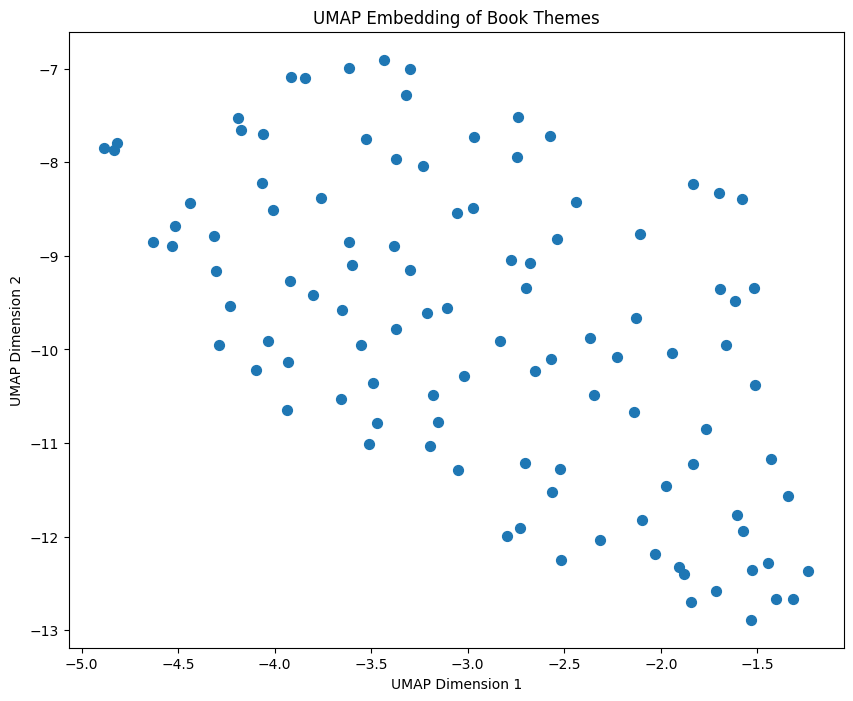

In [ ]:
!pip install umap-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Prepare data by excluding 'Book_Title' and 'Cluster' columns, if already present
theme_data_for_clustering = df_topic_distribution_with_labels.drop(columns=['Book_Title', 'Cluster'], errors='ignore')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(theme_data_for_clustering)

# Apply UMAP for dimensionality reduction (no predefined clusters needed)
umap_reducer = umap.UMAP(random_state=0)
umap_embedding = umap_reducer.fit_transform(scaled_data)

# Visualize UMAP embedding
plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=50, cmap="viridis")
plt.title("UMAP Embedding of Book Themes")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Dictionary to store silhouette scores for each approach
silhouette_scores_umap = {}

# Clustering with KMeans (try different cluster numbers)
for n_clusters in [3, 5, 7, 8, 10, 12, 15, 18, 20]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_labels = kmeans.fit_predict(umap_embedding)
    score = silhouette_score(umap_embedding, kmeans_labels)
    silhouette_scores_umap[f'KMeans_{n_clusters}_clusters'] = score

# Clustering with Agglomerative Clustering (try different linkage methods)
for linkage_method in ['ward', 'average', 'complete']:
    agg_clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage_method)
    agg_labels = agg_clustering.fit_predict(umap_embedding)
    score = silhouette_score(umap_embedding, agg_labels)
    silhouette_scores_umap[f'Agglomerative_{linkage_method}'] = score

# Clustering with DBSCAN and varying epsilon to find optimal clustering
for eps in [0.3, 0.5, 0.7]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(umap_embedding)
    if len(np.unique(dbscan_labels)) > 1:  # Only if DBSCAN forms clusters
        score = silhouette_score(umap_embedding, dbscan_labels)
        silhouette_scores_umap[f'DBSCAN_eps_{eps}'] = score
    else:
        silhouette_scores_umap[f'DBSCAN_eps_{eps}'] = np.nan  # Poor clustering

# Display silhouette scores for UMAP-based clustering
print("Silhouette Scores for Clustering on UMAP Embedding:")
print(silhouette_scores_umap)

Silhouette Scores for Clustering on UMAP Embedding:
{'KMeans_3_clusters': 0.40745044, 'KMeans_5_clusters': 0.39039642, 'KMeans_7_clusters': 0.37843442, 'KMeans_8_clusters': 0.37097004, 'KMeans_10_clusters': 0.3838097, 'KMeans_12_clusters': 0.37333682, 'KMeans_15_clusters': 0.3659057, 'KMeans_18_clusters': 0.40095475, 'KMeans_20_clusters': 0.39564583, 'Agglomerative_ward': 0.3825107, 'Agglomerative_average': 0.38682488, 'Agglomerative_complete': 0.36685646, 'DBSCAN_eps_0.3': -0.16133526, 'DBSCAN_eps_0.5': 0.16470546, 'DBSCAN_eps_0.7': nan}


Top 15 themes for KMeans with 3 clusters saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/top_themes_kmeans_3_clusters.csv


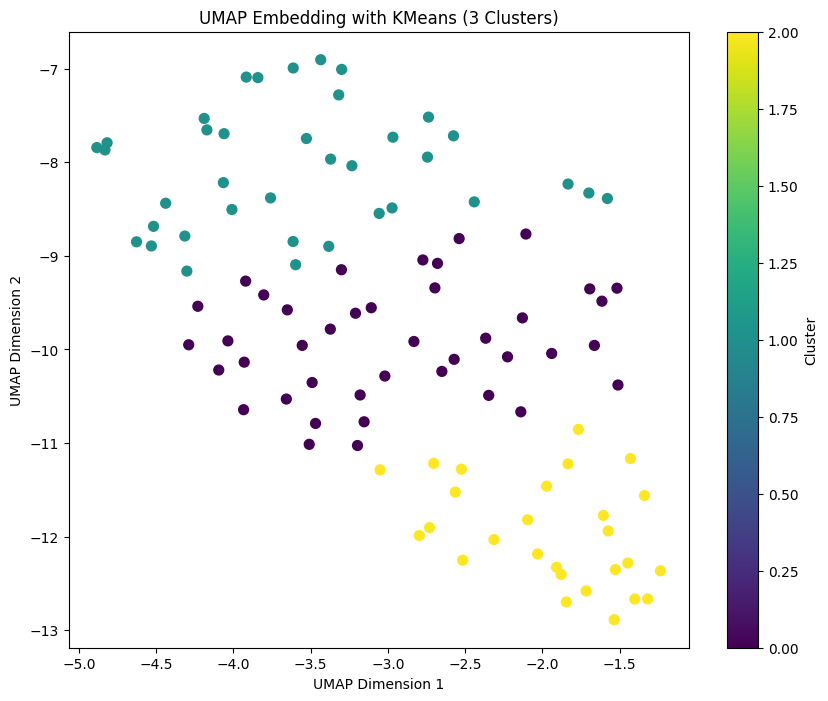

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Assuming UMAP embedding (umap_embedding) and theme data are available

# Apply KMeans with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3_labels = kmeans_3.fit_predict(umap_embedding)

# Add the cluster labels to the original DataFrame for analysis
df_topic_distribution_with_labels['KMeans_3_Cluster'] = kmeans_3_labels

# Exclude 'Book_Title' and calculate mean theme frequency for each cluster
kmeans_3_cluster_characteristics = df_topic_distribution_with_labels.drop(columns=['Book_Title']).groupby('KMeans_3_Cluster').mean().transpose()

# Select top 15 themes for each cluster
top_themes_kmeans_3 = kmeans_3_cluster_characteristics.apply(lambda x: x.nlargest(15), axis=0)

# Save top themes for each cluster to a CSV file
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'
output_path_kmeans_3 = f"{folder_path}/top_themes_kmeans_3_clusters.csv"
top_themes_kmeans_3.to_csv(output_path_kmeans_3)
print(f"Top 15 themes for KMeans with 3 clusters saved to: {output_path_kmeans_3}")

# Visualize UMAP embedding with 3 clusters
plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=kmeans_3_labels, cmap="viridis", s=50)
plt.title("UMAP Embedding with KMeans (3 Clusters)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

Top 15 themes for KMeans with 18 clusters saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/top_themes_kmeans_18_clusters.csv


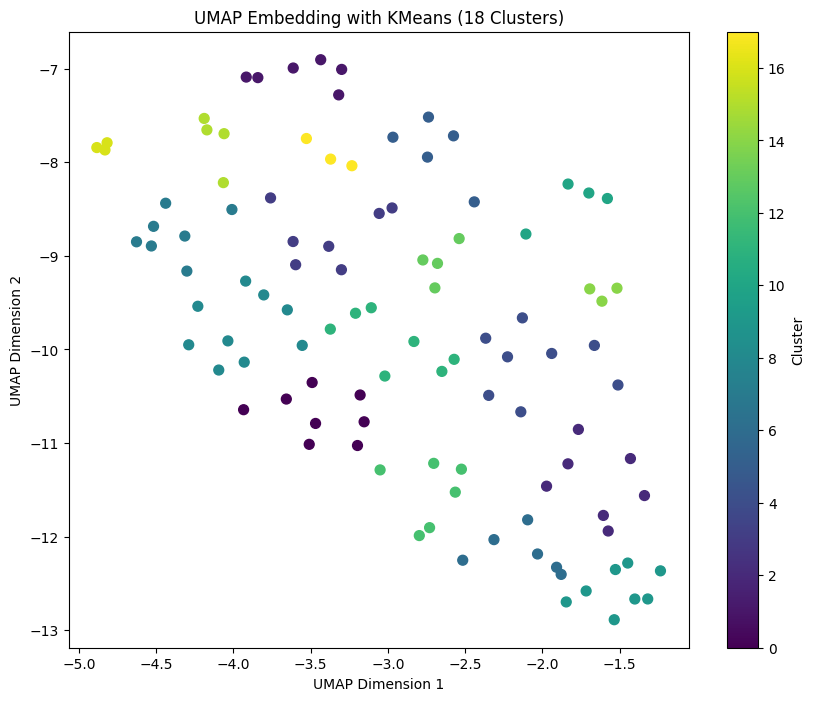

In [ ]:
# Apply KMeans with 18 clusters
kmeans_18 = KMeans(n_clusters=18, random_state=0)
kmeans_18_labels = kmeans_18.fit_predict(umap_embedding)

# Add the cluster labels to the original DataFrame for analysis
df_topic_distribution_with_labels['KMeans_18_Cluster'] = kmeans_18_labels

# Exclude 'Book_Title' and calculate mean theme frequency for each cluster
kmeans_18_cluster_characteristics = df_topic_distribution_with_labels.drop(columns=['Book_Title']).groupby('KMeans_18_Cluster').mean().transpose()

# Select top 15 themes for each cluster
top_themes_kmeans_18 = kmeans_18_cluster_characteristics.apply(lambda x: x.nlargest(15), axis=0)

# Save top themes for each cluster to a CSV file
output_path_kmeans_18 = f"{folder_path}/top_themes_kmeans_18_clusters.csv"
top_themes_kmeans_18.to_csv(output_path_kmeans_18)
print(f"Top 15 themes for KMeans with 18 clusters saved to: {output_path_kmeans_18}")

# Visualize UMAP embedding with 18 clusters
plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=kmeans_18_labels, cmap="viridis", s=50)
plt.title("UMAP Embedding with KMeans (18 Clusters)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming UMAP embedding (umap_embedding) and theme data are available

# Folder path to save results
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'

# Apply KMeans with 3 clusters and save all theme frequencies
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3_labels = kmeans_3.fit_predict(umap_embedding)
df_topic_distribution_with_labels['KMeans_3_Cluster'] = kmeans_3_labels
kmeans_3_cluster_characteristics = df_topic_distribution_with_labels.drop(columns=['Book_Title']).groupby('KMeans_3_Cluster').mean().transpose()
output_path_kmeans_3_all = f"{folder_path}/all_themes_kmeans_3_clusters.csv"
kmeans_3_cluster_characteristics.to_csv(output_path_kmeans_3_all)
print(f"All themes for KMeans with 3 clusters saved to: {output_path_kmeans_3_all}")

# Apply KMeans with 18 clusters and save all theme frequencies
kmeans_18 = KMeans(n_clusters=18, random_state=0)
kmeans_18_labels = kmeans_18.fit_predict(umap_embedding)
df_topic_distribution_with_labels['KMeans_18_Cluster'] = kmeans_18_labels
kmeans_18_cluster_characteristics = df_topic_distribution_with_labels.drop(columns=['Book_Title']).groupby('KMeans_18_Cluster').mean().transpose()
output_path_kmeans_18_all = f"{folder_path}/all_themes_kmeans_18_clusters.csv"
kmeans_18_cluster_characteristics.to_csv(output_path_kmeans_18_all)
print(f"All themes for KMeans with 18 clusters saved to: {output_path_kmeans_18_all}")

All themes for KMeans with 3 clusters saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/all_themes_kmeans_3_clusters.csv
All themes for KMeans with 18 clusters saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/all_themes_kmeans_18_clusters.csv


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Real, Categorical
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import umap
import numpy as np
from datetime import datetime

# Dictionary to store silhouette scores for each approach
silhouette_scores_umap = {}

def print_timestamp(message):
    """Helper function to print message with timestamp"""
    print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - {message}")

# Bayesian Optimization for UMAP parameters
def umap_objective(params):
    n_neighbors, min_dist = params
    umap_reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=0)
    umap_embedding = umap_reducer.fit_transform(theme_data_for_clustering)

    # Perform a quick KMeans clustering to evaluate embedding quality with Silhouette Score
    kmeans = KMeans(n_clusters=5, random_state=0)  # Fixed cluster count for UMAP assessment
    kmeans_labels = kmeans.fit_predict(umap_embedding)
    score = silhouette_score(umap_embedding, kmeans_labels)

    return -score  # Minimize negative Silhouette Score

print_timestamp("Starting Bayesian Optimization for UMAP parameters...")

# Define UMAP search space
umap_space = [Integer(5, 50, name="n_neighbors"), Real(0.0, 0.99, name="min_dist")]

# Optimize UMAP parameters
umap_opt = gp_minimize(umap_objective, umap_space, n_calls=15, random_state=0)
best_umap_n_neighbors = umap_opt.x[0]
best_umap_min_dist = umap_opt.x[1]
umap_reducer = umap.UMAP(n_neighbors=best_umap_n_neighbors, min_dist=best_umap_min_dist, random_state=0)
best_umap_embedding = umap_reducer.fit_transform(theme_data_for_clustering)
print_timestamp(f"Completed UMAP Optimization: Best n_neighbors = {best_umap_n_neighbors}, min_dist = {best_umap_min_dist}")

# Clustering Optimization on Optimized UMAP Embedding

# Bayesian Optimization for KMeans
def kmeans_objective(params):
    n_clusters = params[0]
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_labels = kmeans.fit_predict(best_umap_embedding)
    score = silhouette_score(best_umap_embedding, kmeans_labels)
    return -score  # Minimize negative Silhouette Score

print_timestamp("Starting Bayesian Optimization for KMeans...")
# Define search space for KMeans
kmeans_space = [Integer(2, 30, name="n_clusters")]

# Optimize KMeans
kmeans_opt = gp_minimize(kmeans_objective, kmeans_space, n_calls=15, random_state=0)
best_kmeans_n_clusters = kmeans_opt.x[0]
best_kmeans_score = -kmeans_opt.fun
silhouette_scores_umap[f'KMeans_best_{best_kmeans_n_clusters}_clusters'] = best_kmeans_score
print_timestamp(f"Completed KMeans Optimization: Best n_clusters = {best_kmeans_n_clusters}, Silhouette Score = {best_kmeans_score}")

# Bayesian Optimization for Agglomerative Clustering
def agg_objective(params):
    n_clusters, linkage = params
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    agg_labels = agg_clustering.fit_predict(best_umap_embedding)
    score = silhouette_score(best_umap_embedding, agg_labels)
    return -score

print_timestamp("Starting Bayesian Optimization for Agglomerative Clustering...")
# Define search space for Agglomerative Clustering
agg_space = [Integer(2, 30, name="n_clusters"),
             Categorical(['ward', 'average', 'complete'], name="linkage")]

# Optimize Agglomerative Clustering
agg_opt = gp_minimize(agg_objective, agg_space, n_calls=15, random_state=0)
best_agg_n_clusters, best_agg_linkage = agg_opt.x
best_agg_score = -agg_opt.fun
silhouette_scores_umap[f'Agglomerative_best_{best_agg_n_clusters}_clusters_{best_agg_linkage}'] = best_agg_score
print_timestamp(f"Completed Agglomerative Clustering Optimization: Best n_clusters = {best_agg_n_clusters}, Linkage = {best_agg_linkage}, Silhouette Score = {best_agg_score}")

# Bayesian Optimization for DBSCAN
def dbscan_objective(params):
    eps = params[0]
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(best_umap_embedding)
    if len(np.unique(dbscan_labels)) > 1:  # Only calculate score if DBSCAN forms clusters
        score = silhouette_score(best_umap_embedding, dbscan_labels)
        return -score
    return -1e6  # Return a large negative value if clustering fails

print_timestamp("Starting Bayesian Optimization for DBSCAN...")
# Define search space for DBSCAN
dbscan_space = [Real(0.1, 1.0, name="eps")]

# Optimize DBSCAN
dbscan_opt = gp_minimize(dbscan_objective, dbscan_space, n_calls=15, random_state=0)
best_dbscan_eps = dbscan_opt.x[0]
best_dbscan_score = -dbscan_opt.fun if dbscan_opt.fun != 1e6 else "No valid clustering"
silhouette_scores_umap[f'DBSCAN_best_eps_{best_dbscan_eps}'] = best_dbscan_score
print_timestamp(f"Completed DBSCAN Optimization: Best eps = {best_dbscan_eps}, Silhouette Score = {best_dbscan_score}")

# Display silhouette scores for optimized clustering
print_timestamp("Optimization completed for all clustering methods.")
print("Optimized Silhouette Scores for Clustering on UMAP Embedding:")
print(silhouette_scores_umap)

2024-11-08 22:25:36 - Starting Bayesian Optimization for UMAP parameters...


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr

2024-11-08 22:25:54 - Completed UMAP Optimization: Best n_neighbors = 17, min_dist = 0.05194013412943914
2024-11-08 22:25:54 - Starting Bayesian Optimization for KMeans...
2024-11-08 22:26:02 - Completed KMeans Optimization: Best n_clusters = 10, Silhouette Score = 0.5114247798919678
2024-11-08 22:26:02 - Starting Bayesian Optimization for Agglomerative Clustering...
2024-11-08 22:26:12 - Completed Agglomerative Clustering Optimization: Best n_clusters = 2, Linkage = ward, Silhouette Score = 0.6301451325416565
2024-11-08 22:26:12 - Starting Bayesian Optimization for DBSCAN...
2024-11-08 22:26:22 - Completed DBSCAN Optimization: Best eps = 0.1510416795856989, Silhouette Score = 1000000.0
2024-11-08 22:26:22 - Optimization completed for all clustering methods.
Optimized Silhouette Scores for Clustering on UMAP Embedding:
{'KMeans_best_10_clusters': 0.5114248, 'Agglomerative_best_2_clusters_ward': 0.63014513, 'DBSCAN_best_eps_0.1510416795856989': 1000000.0}


In [ ]:
# Import UMAP and apply with optimal parameters
import umap

# Assuming theme_data_for_clustering contains the original feature data for UMAP
umap_reducer = umap.UMAP(n_neighbors=17, min_dist=0.0519, random_state=0)
best_umap_embedding = umap_reducer.fit_transform(theme_data_for_clustering)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Top 10 Themes per KMeans Cluster (10 Clusters):
KMeans_10_Cluster                                  0        1           2  \
Affirmations and Mutual Agreements        145.846154  51.0000  867.272727   
Bedroom and Cozy Blankets                  65.230769  25.0625   89.181818   
Business and Big Money                           NaN      NaN         NaN   
Deep Expressions of Affection                    NaN      NaN         NaN   
Doors and Entrances                        58.692308  23.3125  110.090909   
Expressive Gazes and Eye Contact                 NaN      NaN         NaN   
Healing and Care in Medical Settings             NaN      NaN         NaN   
Inner Conflicts and Doubts                157.769231  71.4375  325.636364   
Laughter and Joy                          154.076923  49.8750  307.454545   
Luxury Cars and Driving                          NaN      NaN         NaN   
Marriage and Commitment                          NaN  27.4375  104.818182   
Nighttime Rendezvous and Eve

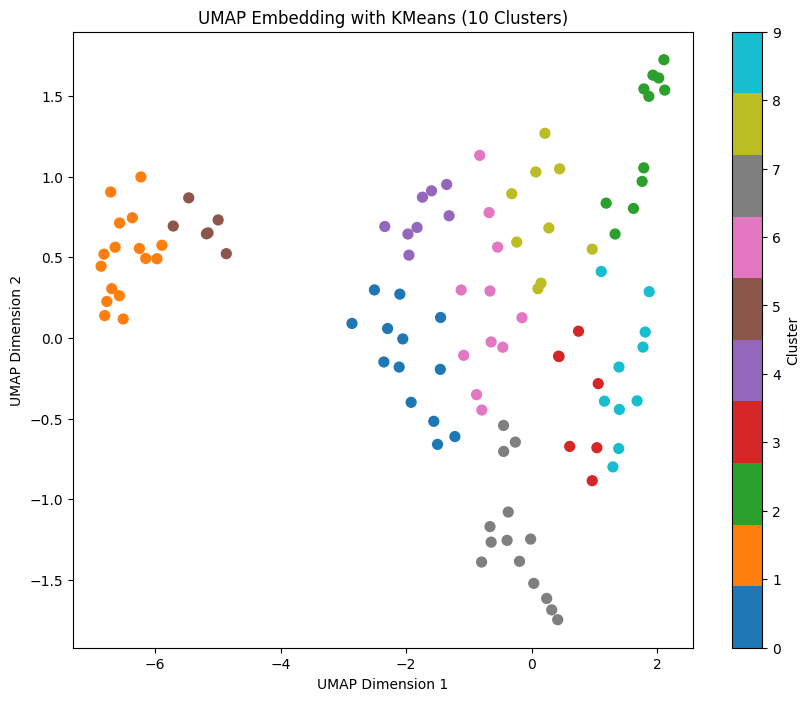

In [ ]:
# Applying KMeans with the best parameter (10 clusters) to the optimized UMAP embedding
best_kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_labels = best_kmeans.fit_predict(best_umap_embedding)

# Add the KMeans cluster labels to the UMAP-embedded data for analysis
df_topic_distribution_with_labels['KMeans_10_Cluster'] = kmeans_labels

# Analyzing cluster characteristics by calculating the mean theme frequency for each cluster
# Exclude non-numeric columns if present and group by the new cluster labels
cluster_characteristics = df_topic_distribution_with_labels.drop(columns=['Book_Title', 'Cluster'], errors='ignore').groupby('KMeans_10_Cluster').mean().transpose()

# Select the top 10 themes for each cluster to identify the distinctive thematic focus of each group
top_themes_per_cluster = cluster_characteristics.apply(lambda x: x.nlargest(10), axis=0)

# Display the top 10 themes per cluster for analysis
print("Top 10 Themes per KMeans Cluster (10 Clusters):")
print(top_themes_per_cluster)

# Plotting the UMAP embedding with clusters labeled
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(best_umap_embedding[:, 0], best_umap_embedding[:, 1], c=kmeans_labels, cmap="tab10", s=50)
plt.title("UMAP Embedding with KMeans (10 Clusters)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Define the file path where the results will be saved
output_path = "/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/top_themes_per_kmeans_10_clusters.csv"

# Save the top themes per cluster to a CSV file
top_themes_per_cluster.to_csv(output_path)

print(f"Top themes per cluster saved to: {output_path}")

Top themes per cluster saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/top_themes_per_kmeans_10_clusters.csv


In [ ]:
# Define the file path where the full cluster theme data will be saved
output_path_all_themes = "/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/all_themes_per_kmeans_10_clusters.csv"

# Save all theme frequencies per cluster to a CSV file
cluster_characteristics.to_csv(output_path_all_themes)

print(f"All themes per cluster saved to: {output_path_all_themes}")

All themes per cluster saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/all_themes_per_kmeans_10_clusters.csv


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load the CSV file containing all themes for each KMeans 10 cluster
all_themes_kmeans_10_path = "/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/all_themes_per_kmeans_10_clusters.csv"  # Update with the correct path
all_themes_kmeans_10 = pd.read_csv(all_themes_kmeans_10_path, index_col=0)

# Prepare the data for ANOVA
anova_results = {}
for theme in all_themes_kmeans_10.index:
    # Extract frequencies of the theme across all clusters
    theme_data = [all_themes_kmeans_10[cluster].dropna() for cluster in all_themes_kmeans_10.columns]

    # Perform ANOVA to test if theme frequency differs significantly across clusters
    anova = f_oneway(*theme_data)

    # Store the p-value for each theme
    anova_results[theme] = anova.pvalue

# Convert results to a DataFrame for analysis
anova_df = pd.DataFrame(list(anova_results.items()), columns=['Theme', 'p-value'])

# Sort themes by significance (p-value) to identify themes with significant differences across clusters
significant_themes = anova_df.sort_values(by='p-value').reset_index(drop=True)

# Display the top themes that significantly differentiate clusters
print("Significant themes that differentiate clusters (based on ANOVA p-values):")
print(significant_themes.head(20))


Significant themes that differentiate clusters (based on ANOVA p-values):
                                     Theme       p-value
0                         Laughter and Joy  1.211083e-07
1    Gritted Teeth and Suppressed Emotions  1.211083e-07
2                        Taste and Flavors  1.211083e-07
3              Law enforcement or Security  1.211083e-07
4                         Change Your Mind  1.211083e-07
5                    Jeans and Casual Wear  1.211083e-07
6                Figuring Out and Planning  1.211083e-07
7                      Expensive Jewellery  1.211083e-07
8                               Eyeglasses  1.211083e-07
9   Need for Space and Personal Boundaries  1.211083e-07
10         Suffering and Terrible Feelings  1.211083e-07
11       Startling and Sudden Realizations  1.211083e-07
12                 Beliefs and Convictions  1.211083e-07
13                       Expecting a Child  1.211083e-07
14                    Typing on a Keyboard  1.211083e-07
15            